# Installing Dependencies

In [ ]:
## Start by installing the necessary Google Cloud libraries in your Google Colab env
!pip install --upgrade --quiet gcsfs google-cloud-storage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.6 MB/s eta 0:00:00


# Mount Google Drive

In [ ]:
## Authenticate your Google account to access Google Cloud services. This will allow you to interact with Google Cloud Storage using the credentials associated with your account.
## Also import your Google Drive to access your team's Shared Google Drive as well as Operating System
from google.colab import auth
from google.colab import drive
import os

auth.authenticate_user()
drive.mount('/content/drive', force_remount=True)

## If your team is using a Shared Drive in a Google Workspace (usually through a University Gmail account)
# directory_path = '/content/drive/Shared drives/YOUR_SHARED_DRIVE_NAME/'

## if your team is using a Shared Folder in a non-Google Workspace (for a free, individual account)
directory_path = '/content/drive/MyDrive/Colab Notebooks/'


Mounted at /content/drive


# Import Dependencies

In [ ]:
from google.cloud import storage
import os
# from utils import download_folder_contents
import pandas as pd

# Initialize Variables

In [ ]:
CLIENT = storage.Client(project='HDSI-AGRI-Datathon-2024')
BUCKET_NAME = 'hdsi-agri-prompt-data'

## Access the specified bucket
BUCKET = CLIENT.bucket(BUCKET_NAME)
FOLDER_NAME = 'HDSI_AGRI_Prompt_2'
LOCAL_PATH = './dump'
SHARED_FOLDER = '/content/drive/MyDrive/HDSI_Datathon'

Test access to bucket

In [ ]:
## All the data you need will be located in a specific prompt folder located in a Google bucket.
## I have included some code for you all to start exploring file types

## List all blobs (files and folders) in the bucket
blobs = list(BUCKET.list_blobs())

## Initialize variables to count and store folder names and file types
folders = set()
file_types = set()
blob_count = 0

## Loop through all blobs to gather folder names and file types
for blob in blobs:
    blob_name = blob.name

    ## Check if it's a folder (by convention, ends with '/')
    if blob_name.endswith('/'):
        folders.add(blob_name)
    else:
        ## Capture file type
        file_extension = blob_name.split('.')[-1] if '.' in blob_name else 'Unknown'
        file_types.add(file_extension)

    blob_count += 1

## list the folders
print("Folders in the bucket:")
for folder in folders:
    print(f" - {folder}")

## Show the file types of the first 5 files (skip folders)
print("\nFirst 5 file types:")
counter = 0
for blob in blobs:
    if not blob.name.endswith('/') and counter < 5:
        file_name = blob.name
        file_extension = file_name.split('.')[-1] if '.' in file_name else 'Unknown'
        print(f"File name: {file_name}, File type: {file_extension}")
        counter += 1

## Total count of blobs
print(f"\nTotal number of blobs in the bucket: {blob_count}")

## Print the unique file types found
print(f"\nFile types in the bucket: {', '.join(file_types)}")


Folders in the bucket:
 - HDSI_AGRI_Prompt_1/
 - HDSI_AGRI_Prompt_1/cropland_images/
 - HDSI_AGRI_Prompt_2/
 - HDSI_AGRI_Prompt_3/

First 5 file types:
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_01_NDVI.tif, File type: tif
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_02_NDVI.tif, File type: tif
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_03_NDVI.tif, File type: tif
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_04_NDVI.tif, File type: tif
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_05_NDVI.tif, File type: tif

Total number of blobs in the bucket: 14974

File types in the bucket: tif, dbf, csv, xlsx


# Download Contents from Cloud Bucket

In [ ]:
from google.cloud import storage
import os

def download_folder_contents(bucket_name, folder_name, local_directory):
    # Initialize the Google Cloud Storage client
    client = storage.Client()

    # Get the bucket
    bucket = client.bucket(bucket_name)

    # List all blobs (files) in the specified folder
    blobs = bucket.list_blobs(prefix=folder_name)

    # Create the local directory if it doesn't exist
    os.makedirs(local_directory, exist_ok=True)

    # Download each file
    for blob in blobs:
        # Skip the folder itself
        if blob.name.endswith('/'):
            continue

        # Get the relative path of the file within the folder
        relative_path = os.path.relpath(blob.name, folder_name)

        # Construct the local file path
        local_file_path = os.path.join(local_directory, relative_path)

        # Create subdirectories if they don't exist
        os.makedirs(os.path.dirname(local_file_path), exist_ok=True)

        # Download the file
        blob.download_to_filename(local_file_path)
        print(f"Downloaded: {blob.name} to {local_file_path}")

# download_folder_contents(BUCKET_NAME, FOLDER_NAME, LOCAL_PATH)


Downloaded: HDSI_AGRI_Prompt_2/guide_prompt2_prompt3_sales.xlsx to ./dump/guide_prompt2_prompt3_sales.xlsx
Downloaded: HDSI_AGRI_Prompt_2/inflation_GDP_price_index.xlsx to ./dump/inflation_GDP_price_index.xlsx
Downloaded: HDSI_AGRI_Prompt_2/prompt2_demos_landtotals_county.csv to ./dump/prompt2_demos_landtotals_county.csv
Downloaded: HDSI_AGRI_Prompt_2/prompt2_prompt3_sales.csv to ./dump/prompt2_prompt3_sales.csv
Downloaded: HDSI_AGRI_Prompt_2/sales_data_county.csv to ./dump/sales_data_county.csv
Downloaded: HDSI_AGRI_Prompt_2/state_level_2002_2007_2012_2017_2022.xlsx to ./dump/state_level_2002_2007_2012_2017_2022.xlsx


In [ ]:
# Move files from Local to Share drive folder
# !mv dump/*.{xlsx,csv} /content/drive/MyDrive/HDSI_Datathon/Prompt-2-Data/

# EDA Prompt 2

In [ ]:
landTotalsDf = pd.read_csv(os.path.join(SHARED_FOLDER, 'Prompt-2-Data', 'prompt2_demos_landtotals_county.csv'))

<ipython-input-7-68b116ebb23d>:1: DtypeWarning: Columns (25,27,51,52,69,88,93,101,146,154,159) have mixed types. Specify dtype option on import or set low_memory=False.
  landTotalsDf = pd.read_csv(os.path.join(SHARED_FOLDER, 'Prompt-2-Data', 'prompt2_demos_landtotals_county.csv'))


In [ ]:
landTotalsDf.head()

,STATE_FIPS_CODE,COUNTY_CODE,YEAR,AG_LAND_CROPLAND_HARVESTED_ACRES,AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_FULL_OWNER,AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_PART_OWNER,AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_TENANT,AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS,AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS_WHERE_TENURE_FULL_OWNER,AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS_WHERE_TENURE_PART_OWNER,...,PRODUCERS_WHITE_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_ANY_OPERATION_6_TO_10_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_ANY_OPERATION_AVG_MEASURED_IN_YEARS,PRODUCERS_YEARS_ON_ANY_OPERATION_GE_11_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_ANY_OPERATION_LT_6_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_3_TO_4_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_5_TO_9_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_AVG_MEASURED_IN_YEARS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_GE_10_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_LT_3_YEARS_NUMBER_OF_PRODUCERS
0,1,1,1997,27857,5834,13764,8259,246.0,132.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2002,26132,8897,13344,3891,201.0,113.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2007,18548,4298,8820,5430,196.0,100.0,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,2012,29676,5607,16671,7398,204.0,102.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,2017,27557,4321,17027,6209,167.0,74.0,82.0,...,493.0,84.0,22.2,386.0,98.0,66.0,104.0,20.0,368.0,30.0


The dataset has a total of 162 columns.

In [ ]:
# Finding common columns between guide and the land totals
guide_crop_vars = pd.read_excel(os.path.join(SHARED_FOLDER, 'Prompt-2-Data', 'guide_prompt2_prompt3_sales.xlsx'), sheet_name='crop data variables')

set(landTotalsDf.columns) & set(guide_crop_vars.values[:, 0])

{'AG_LAND_CROPLAND_HARVESTED_ACRES',
 'AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS',
 'COUNTY_CODE',
 'STATE_FIPS_CODE',
 'YEAR'}

In [ ]:
# Encode columns to efficiently act as axis labels
cols_encode = {e:i for i, e in enumerate(landTotalsDf.columns)}

In [ ]:
# Checking for missing values and providing a summary of the dataset
missing_values = landTotalsDf.isnull().sum()
summary_statistics = landTotalsDf.describe(include='all')

# Display the missing values count and the summary statistics
missing_values.sort_values(ascending=False).head(20).apply(lambda x: round(x/len(landTotalsDf)*100,2))

,0
OPERATORS_NUMBER_OF_OPERATIONS_WHERE_OPERATORS_5_OR_MORE_FEMALE_OPERATORS,94.81
PRODUCERS_NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER_NUMBER_OF_PRODUCERS,93.42
PRODUCERS_NUMBER_OF_OPERATIONS_WHERE_PRODUCERS_5_OR_MORE_FEMALE_PRODUCERS,91.81
OPERATORS_NUMBER_OF_OPERATIONS_WHERE_OPERATORS_4_FEMALE_OPERATORS,91.05
PRODUCERS_NUMBER_OF_OPERATIONS_WHERE_PRODUCERS_4_FEMALE_PRODUCERS,87.25
OPERATORS_PRINCIPAL_YEARS_ON_ANY_OPERATION_LT_3_YEARS_NUMBER_OF_OPERATORS,84.04
OPERATORS_PRINCIPAL_YEARS_ON_ANY_OPERATION_3_TO_4_YEARS_NUMBER_OF_OPERATORS,83.64
PRODUCERS_AGE_LT_35_NUMBER_OF_PRODUCERS,83.46
OPERATORS_PRINCIPAL_YEARS_ON_ANY_OPERATION_5_TO_9_YEARS_NUMBER_OF_OPERATORS,83.43
INTERNET_ACCESS_VIA_BROADBAND_NUMBER_OF_OPERATIONS,83.35


## Missing points

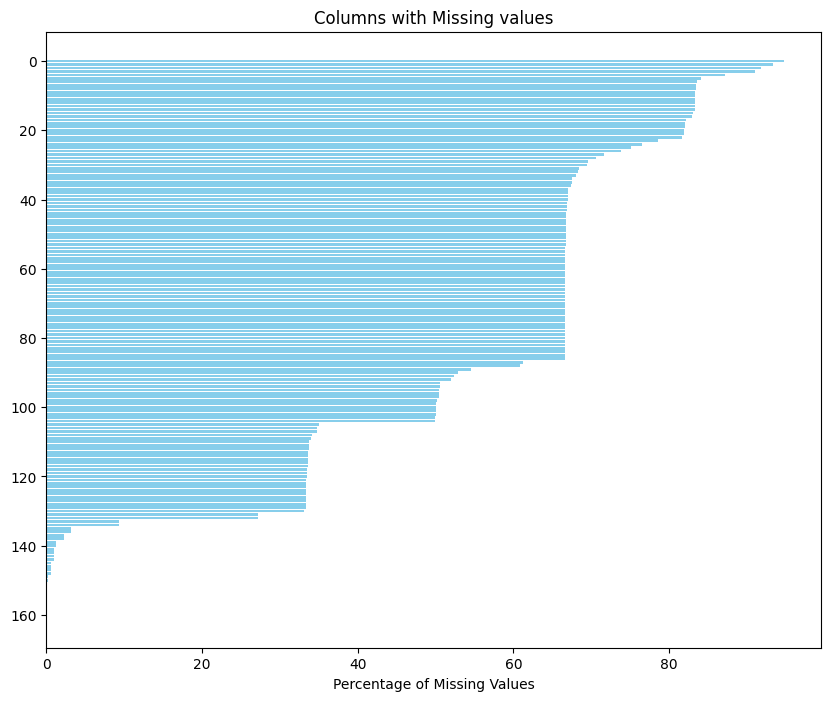

In [ ]:
import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_percentage = (landTotalsDf.isnull().sum() / len(landTotalsDf)) * 100

# Sort the missing percentage in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Plot the missing values
plt.figure(figsize=(10,8))
plt.barh(list(cols_encode.values()), missing_percentage_sorted.values, color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.title('Columns with Missing values')
plt.gca().invert_yaxis()  # Invert y-axis to display largest missing percentage at the top
plt.show()

In [ ]:
# Drop the missing values
threshold = 80
columns_to_drop = missing_percentage[missing_percentage > threshold].index
cleaned_data = landTotalsDf.drop(columns=columns_to_drop)

# Display the new shape of the dataset after dropping columns
cleaned_data.shape

(18765, 139)

In [ ]:
# Get an overview of the cleaned data: types and summary statistics
cleaned_data_info = cleaned_data.info()

cleaned_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18765 entries, 0 to 18764
Columns: 139 entries, STATE_FIPS_CODE to PRODUCERS_YEARS_ON_PRESENT_OPERATION_LT_3_YEARS_NUMBER_OF_PRODUCERS
dtypes: float64(108), int64(4), object(27)
memory usage: 19.9+ MB


In [ ]:
# Print out the columns which start with AG
for e in landTotalsDf.columns:
  if e.startswith('AG'):
    print(e)

AG_LAND_CROPLAND_HARVESTED_ACRES
AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_FULL_OWNER
AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_PART_OWNER
AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_TENANT
AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS
AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS_WHERE_TENURE_FULL_OWNER
AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS_WHERE_TENURE_PART_OWNER
AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS_WHERE_TENURE_TENANT
AG_LAND_OWNED_IN_FARMS_ACRES
AG_LAND_OWNED_IN_FARMS_ACRES_ON_OPERATIONS_WITH_TENURE_PART_OWNER
AG_LAND_OWNED_IN_FARMS_NUMBER_OF_OPERATIONS
AG_LAND_RENTED_FROM_OTHERS_IN_FARMS_ACRES
AG_LAND_RENTED_FROM_OTHERS_IN_FARMS_ACRES_ON_OPERATIONS_WITH_TENURE_PART_OWNER
AG_LAND_RENTED_FROM_OTHERS_IN_FARMS_NUMBER_OF_OPERATIONS


In [ ]:
# Print out the columns which start with FARM
for e in landTotalsDf.columns:
  if 'FARM_OPERATIONS' in e:
    print(e)

FARM_OPERATIONS_ACRES_OPERATED
FARM_OPERATIONS_ACRES_OPERATED_ON_OPERATIONS_WITH_TENURE_FULL_OWNER
FARM_OPERATIONS_ACRES_OPERATED_ON_OPERATIONS_WITH_TENURE_PART_OWNER
FARM_OPERATIONS_ACRES_OPERATED_ON_OPERATIONS_WITH_TENURE_TENANT
FARM_OPERATIONS_NUMBER_OF_OPERATIONS
FARM_OPERATIONS_NUMBER_OF_OPERATIONS_WHERE_TENURE_FULL_OWNER
FARM_OPERATIONS_NUMBER_OF_OPERATIONS_WHERE_TENURE_PART_OWNER
FARM_OPERATIONS_NUMBER_OF_OPERATIONS_WHERE_TENURE_TENANT
FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_ONE_PRODUCERS_HOUSEHOLD_EXTENDED_FAMILY_ACRES_OPERATED
FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_ONE_PRODUCERS_HOUSEHOLD_EXTENDED_FAMILY_OPERATIONS_WITH_AREA_OPERATED
FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_PRINCIPAL_OPERATOR_RELATED_PERSONS_ACRES_OPERATED
FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_PRINCIPAL_OPERATOR_RELATED_PERSONS_NUMBER_OF_OPERATIONS
FARM_OPERATIONS_ORGANIZATION_LIMITED_LIABILITY_COMPANY_ACRES_OPERATED
FARM_OPERATIONS_ORGANIZA

In [ ]:
# Print out the columns which start with FARM
for e in landTotalsDf.columns:
  if 'PRODUCERS' in e:
    print(e)

FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_ONE_PRODUCERS_HOUSEHOLD_EXTENDED_FAMILY_ACRES_OPERATED
FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_ONE_PRODUCERS_HOUSEHOLD_EXTENDED_FAMILY_OPERATIONS_WITH_AREA_OPERATED
PRODUCERS_AGE_25_TO_34_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_35_TO_44_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_45_TO_54_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_55_TO_64_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_65_TO_74_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_AVG_MEASURED_IN_YEARS
PRODUCERS_AGE_GE_75_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_LT_25_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_LT_35_NUMBER_OF_PRODUCERS
PRODUCERS_ALL_FEMALE_NUMBER_OF_PRODUCERS
PRODUCERS_ALL_MALE_NUMBER_OF_PRODUCERS
PRODUCERS_ALL_NUMBER_OF_PRODUCERS
PRODUCERS_AMERICAN_INDIAN_OR_ALASKA_NATIVE_NUMBER_OF_PRODUCERS
PRODUCERS_ASIAN_NUMBER_OF_PRODUCERS
PRODUCERS_BLACK_OR_AFRICAN_AMERICAN_NUMBER_OF_PRODUCERS
PRODUCERS_DAY_TO_DAY_DECISIONMAKING_NUMBER_OF_PRODUCERS
PRODUCERS_DAYS_WORKED_OFF_OPERATION_0_DAYS_NUMBER_OF_PRODUCERS
PR

## Time Trends for Cropland Harvested and Farm Operations (1997-2022)

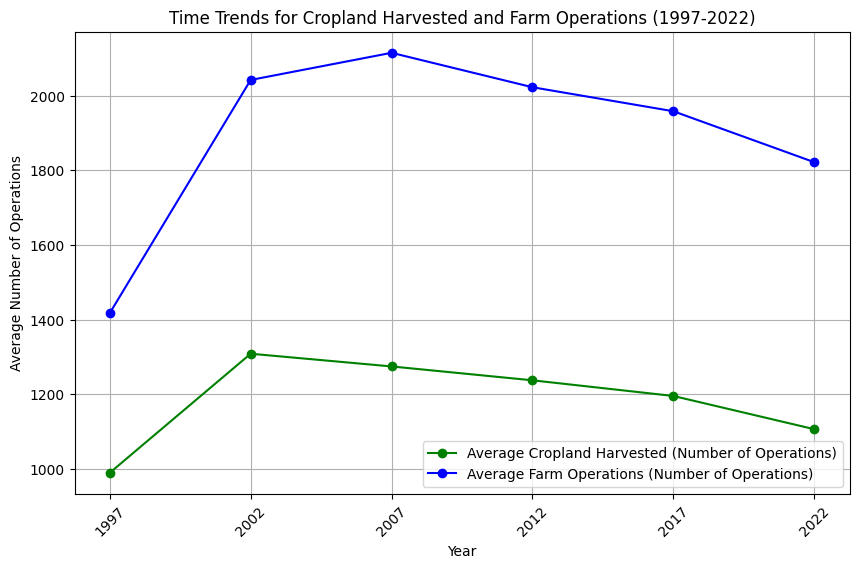

In [ ]:
# Aggregating data by year to analyze time trends for cropland harvested and farm operations
cropland_harvested_by_year = cleaned_data.groupby('YEAR')['AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS'].mean()
farm_operations_by_year = cleaned_data.groupby('YEAR')['FARM_OPERATIONS_NUMBER_OF_OPERATIONS'].mean()

# Plotting time trends
plt.figure(figsize=(10, 6))

# Plot Cropland Harvested Over Time
plt.plot(cropland_harvested_by_year, label='Average Cropland Harvested (Number of Operations)', marker='o', color='green')
plt.plot(farm_operations_by_year, label='Average Farm Operations (Number of Operations)', marker='o', color='blue')

# Adding labels and title
plt.title('Time Trends for Cropland Harvested and Farm Operations (1997-2022)')
plt.xlabel('Year')
plt.ylabel('Average Number of Operations')
plt.xticks(cropland_harvested_by_year.index, rotation=45)  # Ensuring individual years are shown on the x-axis
plt.legend()

plt.grid(True)
plt.show()

As we can see that there is a five year gap between years. The number of operations with time keeps decreasing with a peak in 2002 for Cropland operations and 2007 for farmland operations.

If we consider age, the dataframe consists of two columns corresponding to it -
- OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS - Avg age of principal operators
- PRODUCERS_AGE_AVG_MEASURED_IN_YEARS - Average age of producers

## Check for Age columns

In [ ]:
# Checking if there is a column related to the age of farmers
age_columns = [col for col in cleaned_data.columns if 'AGE' in col.upper()]

# Displaying the relevant columns related to farmer's age
age_columns

['OPERATORS_PRINCIPAL_AGE_25_TO_34_NUMBER_OF_OPERATORS',
 'OPERATORS_PRINCIPAL_AGE_35_TO_44_NUMBER_OF_OPERATORS',
 'OPERATORS_PRINCIPAL_AGE_45_TO_54_NUMBER_OF_OPERATORS',
 'OPERATORS_PRINCIPAL_AGE_55_TO_59_NUMBER_OF_OPERATORS',
 'OPERATORS_PRINCIPAL_AGE_60_TO_64_NUMBER_OF_OPERATORS',
 'OPERATORS_PRINCIPAL_AGE_65_TO_69_NUMBER_OF_OPERATORS',
 'OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS',
 'OPERATORS_PRINCIPAL_AGE_GE_70_NUMBER_OF_OPERATORS',
 'OPERATORS_PRINCIPAL_AGE_LT_25_NUMBER_OF_OPERATORS',
 'PRODUCERS_AGE_25_TO_34_NUMBER_OF_PRODUCERS',
 'PRODUCERS_AGE_35_TO_44_NUMBER_OF_PRODUCERS',
 'PRODUCERS_AGE_45_TO_54_NUMBER_OF_PRODUCERS',
 'PRODUCERS_AGE_55_TO_64_NUMBER_OF_PRODUCERS',
 'PRODUCERS_AGE_65_TO_74_NUMBER_OF_PRODUCERS',
 'PRODUCERS_AGE_AVG_MEASURED_IN_YEARS',
 'PRODUCERS_AGE_GE_75_NUMBER_OF_PRODUCERS',
 'PRODUCERS_AGE_LT_25_NUMBER_OF_PRODUCERS',
 'PRODUCERS_HIRED_MANAGER_NUMBER_OF_PRODUCERS']

## Evolution of Age over time

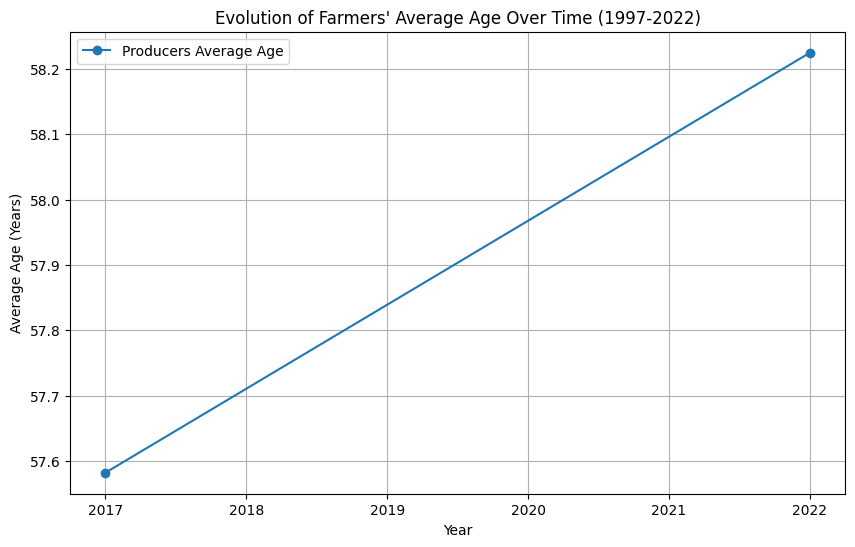

In [ ]:
# Cleaning the 'PRODUCERS_AGE_AVG_MEASURED_IN_YEARS' column by converting to numeric and forcing errors to NaN
cleaned_data['PRODUCERS_AGE_AVG_MEASURED_IN_YEARS'] = pd.to_numeric(cleaned_data['PRODUCERS_AGE_AVG_MEASURED_IN_YEARS'], errors='coerce')

# Grouping the data by year to calculate the average farmer age over time
average_age_by_year_cleaned = cleaned_data.groupby('YEAR')['PRODUCERS_AGE_AVG_MEASURED_IN_YEARS'].mean()

# Plotting the evolution of average age over time
plt.figure(figsize=(10, 6))

plt.plot(average_age_by_year_cleaned, label='Producers Average Age', marker='o')

# Adding labels and title
plt.title('Evolution of Farmers\' Average Age Over Time (1997-2022)')
plt.xlabel('Year')
plt.ylabel('Average Age (Years)')
# plt.xticks(average_age_by_year_cleaned.index, rotation=45)
plt.legend()

plt.grid(True)
plt.show()


We do not observe the age of producers from 1997 till 2017.

## Evolution of Operator Age over time

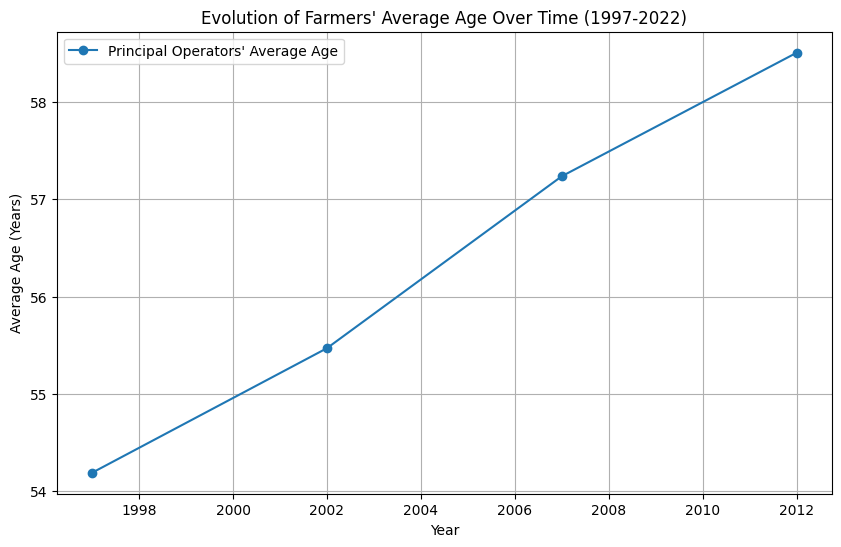

In [ ]:
# Cleaning the 'PRODUCERS_AGE_AVG_MEASURED_IN_YEARS' column by converting to numeric and forcing errors to NaN
cleaned_data['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'] = pd.to_numeric(cleaned_data['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'], errors='coerce')

# Grouping the data by year to calculate the average farmer age over time
average_age_op_by_year_cleaned = cleaned_data.groupby('YEAR')['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'].mean()

# Plotting the evolution of average age over time
plt.figure(figsize=(10, 6))

plt.plot(average_age_op_by_year_cleaned, label="Principal Operators' Average Age", marker='o')

# Adding labels and title
plt.title('Evolution of Farmers\' Average Age Over Time (1997-2022)')
plt.xlabel('Year')
plt.ylabel('Average Age (Years)')
# plt.xticks(average_age_by_year_cleaned.index, rotation=45)
plt.legend()

plt.grid(True)
plt.show()


We see the average of farmers kept on increasing over the years which justifies the statement from the prompt.

# Analyzing Producer

## Distribution of CropLand Harvested

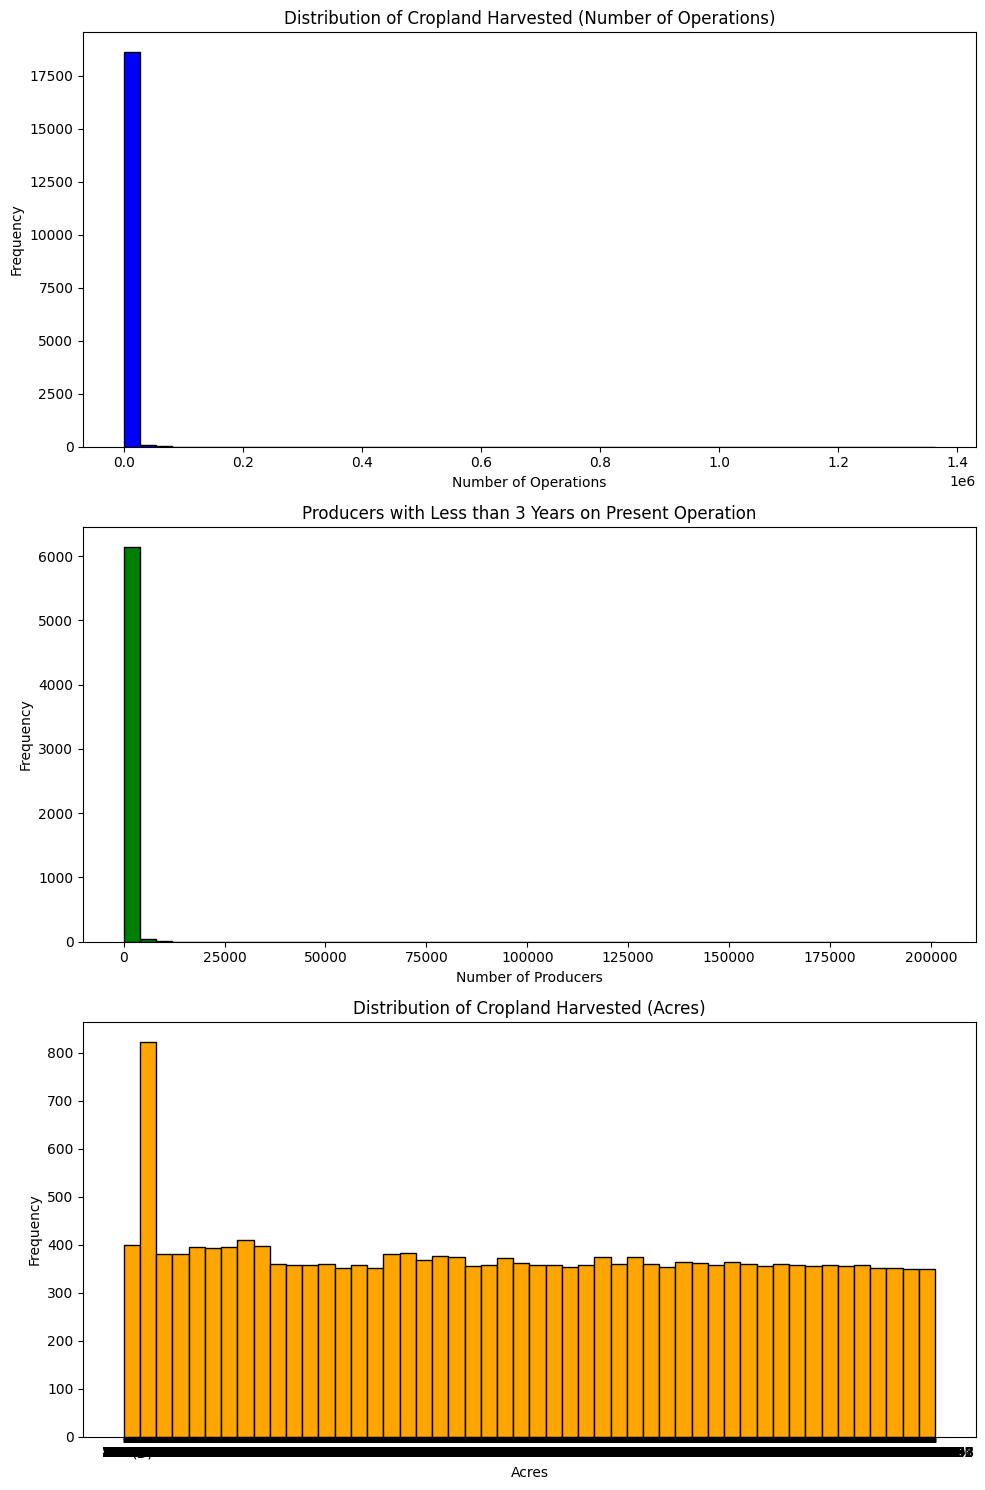

In [ ]:
# Visualizing the distribution of key columns from the sampled data
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Distribution of AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS
axs[0].hist(cleaned_data['AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS'], bins=50, color='blue', edgecolor='black')
axs[0].set_title('Distribution of Cropland Harvested (Number of Operations)')
axs[0].set_xlabel('Number of Operations')
axs[0].set_ylabel('Frequency')

# Distribution of PRODUCERS_YEARS_ON_PRESENT_OPERATION_LT_3_YEARS_NUMBER_OF_PRODUCERS
axs[1].hist(cleaned_data['PRODUCERS_YEARS_ON_PRESENT_OPERATION_LT_3_YEARS_NUMBER_OF_PRODUCERS'], bins=50, color='green', edgecolor='black')
axs[1].set_title('Producers with Less than 3 Years on Present Operation')
axs[1].set_xlabel('Number of Producers')
axs[1].set_ylabel('Frequency')

# Distribution of AG_LAND_CROPLAND_HARVESTED_ACRES
axs[2].hist(cleaned_data['AG_LAND_CROPLAND_HARVESTED_ACRES'], bins=50, color='orange', edgecolor='black')
axs[2].set_title('Distribution of Cropland Harvested (Acres)')
axs[2].set_xlabel('Acres')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
cleaned_data.loc[:,['AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_PART_OWNER', 'YEAR']]

,AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_PART_OWNER,YEAR
0,13764,1997
1,13344,2002
2,8820,2007
3,16671,2012
4,17027,2017
...,...,...
18760,193427322,2002
18761,210295715,2007
18762,218232978,2012
18763,229799386,2017


In [ ]:
# Print out the columns which start with FARM
operator_columns = []
for e in landTotalsDf.columns:
  if 'OPERATORS' in e:
    operator_columns.append(e)

In [ ]:
# Print out the columns which start with FARM
producer_columns = []
for e in landTotalsDf.columns:
  if 'PRODUCER' in e:
    # operator_columns.append(e)
    producer_columns.append(e)

In [ ]:
landTotalsDf.head()

,STATE_FIPS_CODE,COUNTY_CODE,YEAR,AG_LAND_CROPLAND_HARVESTED_ACRES,AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_FULL_OWNER,AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_PART_OWNER,AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_TENANT,AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS,AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS_WHERE_TENURE_FULL_OWNER,AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS_WHERE_TENURE_PART_OWNER,...,PRODUCERS_WHITE_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_ANY_OPERATION_6_TO_10_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_ANY_OPERATION_AVG_MEASURED_IN_YEARS,PRODUCERS_YEARS_ON_ANY_OPERATION_GE_11_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_ANY_OPERATION_LT_6_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_3_TO_4_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_5_TO_9_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_AVG_MEASURED_IN_YEARS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_GE_10_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_LT_3_YEARS_NUMBER_OF_PRODUCERS
0,1,1,1997,27857,5834,13764,8259,246.0,132.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2002,26132,8897,13344,3891,201.0,113.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2007,18548,4298,8820,5430,196.0,100.0,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,2012,29676,5607,16671,7398,204.0,102.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,2017,27557,4321,17027,6209,167.0,74.0,82.0,...,493.0,84.0,22.2,386.0,98.0,66.0,104.0,20.0,368.0,30.0


## Separating Operator and Producer Data

In [ ]:
operatorDf = landTotalsDf[operator_columns + ['YEAR', 'STATE_FIPS_CODE', 'COUNTY_CODE']]
producerDf = landTotalsDf[producer_columns+ ['YEAR', 'STATE_FIPS_CODE', 'COUNTY_CODE']]

In [ ]:
columns_con_drop = set(operatorDf.columns) - set(['YEAR', 'STATE_FIPS_CODE', 'COUNTY_CODE'])
operatorDf = operatorDf.dropna(subset=columns_con_drop, how='all')
operatorDf.YEAR.unique()

array([1997, 2002, 2007, 2012])

In [ ]:
# Do the same analysis for producer
columns_con_drop = set(producerDf.columns) - set(['YEAR', 'STATE_FIPS_CODE', 'COUNTY_CODE'])
producerDf = producerDf.dropna(subset=columns_con_drop, how='all')
producerDf.YEAR.unique()

array([2017, 2022])

## Analyzing the change in average age over years.

In [ ]:
# Let's generate the choropleth map again, making it slightly bigger and adding annotations for age

# Re-import necessary packages
import pandas as pd
import plotly.express as px

# Filter the data for the year 2017 and select relevant columns
age_by_county_2017 = producerDf[['STATE_FIPS_CODE', 'COUNTY_CODE', 'YEAR', 'PRODUCERS_AGE_AVG_MEASURED_IN_YEARS']].dropna()
age_by_county_2017 = age_by_county_2017[age_by_county_2017['YEAR'] == 2017]

# Combine state and county FIPS codes to create a unique identifier for each county
age_by_county_2017['FIPS'] = age_by_county_2017['STATE_FIPS_CODE'].astype(str).str.zfill(2) + age_by_county_2017['COUNTY_CODE'].astype(str).str.zfill(3)

# Prepare the data for mapping
choropleth_data = age_by_county_2017[['FIPS', 'PRODUCERS_AGE_AVG_MEASURED_IN_YEARS']]

# Create the choropleth map with a larger size and annotations for average age
fig = px.choropleth(
    choropleth_data,
    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
    locations='FIPS',
    color='PRODUCERS_AGE_AVG_MEASURED_IN_YEARS',
    color_continuous_scale="Viridis",
    scope="usa",
    labels={'PRODUCERS_AGE_AVG_MEASURED_IN_YEARS': 'Avg Producer Age'},
    title="Average Age of Producers by County (2017)"
)

# Increase the plot size
fig.update_layout(
    width=1000,
    height=700,
    margin={"r":0,"t":50,"l":0,"b":0}
)

# Show the updated map
fig.show()


Change in average age w.r.t Number of producers.

In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd

# Assuming 'producerDf' is your DataFrame
# Extract specific columns
producerDfNumProd = producerDf[['PRODUCERS_AGE_AVG_MEASURED_IN_YEARS', 'PRODUCERS_NUMBER_OF_PRODUCERS']].reset_index(drop=True)

# Find rows with disclosure values (D)
w = np.where(producerDfNumProd.iloc[:, 0] == '(D)', 1, 0)

# Remove the disclosure values: (D)
d_idx = []
for i in range(len(w)):
    if w[i] == 1:
        d_idx.append(i)

producerDfNumProd.drop(d_idx, axis=0, inplace=True)

# Convert the age column to float
producerDfNumProd.iloc[:, 0] = producerDfNumProd.iloc[:, 0].astype('float64')

# Create the bar chart using Plotly
fig = px.bar(
    producerDfNumProd,
    x='PRODUCERS_AGE_AVG_MEASURED_IN_YEARS',
    y='PRODUCERS_NUMBER_OF_PRODUCERS',
    labels={
        'PRODUCERS_AGE_AVG_MEASURED_IN_YEARS': 'Average Producer Age',
        'PRODUCERS_NUMBER_OF_PRODUCERS': 'Number of Producers'
    },
    title="Number of Producers are normal distributed"
)

# Show the plot
fig.show()

## Plot the number of producers by age groups

In [ ]:
import plotly.express as px

def plot_age_by_col_com(df, cols, group_labels, xlabel, ylabel, yaxis_range=None):
    '''
    Function to plot the distribution (bar chart) against age, with dynamic y-axis adjustment.

    Parameters:
    - df: DataFrame containing the data
    - cols: List of columns from the DataFrame to be plotted
    - group_labels: Labels corresponding to the columns
    - xlabel: Label for the x-axis
    - ylabel: Label for the y-axis
    - yaxis_range: Optional argument to specify y-axis range [min, max], or None for auto-adjustment
    '''
    # Extract the relevant columns and create a new DataFrame for visualization
    groups = df[cols].sum().reset_index()

    # Rename columns for better understanding
    groups.columns = ['Group Labels', ylabel]

    # Replace the column names with descriptive group labels
    groups['Group Labels'] = group_labels

    # Create the bar chart using Plotly
    fig = px.bar(
        groups,
        x='Group Labels',
        y=ylabel,
        title=f"{xlabel} comparison against {ylabel}",
        labels={'Group Labels': xlabel, ylabel: ylabel}
    )

    # Adjust the y-axis range if specified
    if yaxis_range is not None:
        fig.update_layout(yaxis=dict(range=yaxis_range))
    else:
        # Automatically adjust the y-axis based on data
        fig.update_layout(yaxis_autorange=True)

    # Show the plot
    fig.show()


In [ ]:
# Get age related columns in the dataset
for e in producerDf.columns:
  if "AGE" in e:
    print(e)

PRODUCERS_AGE_25_TO_34_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_35_TO_44_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_45_TO_54_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_55_TO_64_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_65_TO_74_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_AVG_MEASURED_IN_YEARS
PRODUCERS_AGE_GE_75_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_LT_25_NUMBER_OF_PRODUCERS
PRODUCERS_AGE_LT_35_NUMBER_OF_PRODUCERS
PRODUCERS_HIRED_MANAGER_NUMBER_OF_PRODUCERS


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'producerDf' is already loaded as a DataFrame with the necessary columns
# Extract the specific columns related to age groups
age_group_columns = [
    'PRODUCERS_AGE_25_TO_34_NUMBER_OF_PRODUCERS',
    'PRODUCERS_AGE_35_TO_44_NUMBER_OF_PRODUCERS',
    'PRODUCERS_AGE_45_TO_54_NUMBER_OF_PRODUCERS',
    'PRODUCERS_AGE_55_TO_64_NUMBER_OF_PRODUCERS',
    'PRODUCERS_AGE_65_TO_74_NUMBER_OF_PRODUCERS',
    'PRODUCERS_AGE_GE_75_NUMBER_OF_PRODUCERS'
]

# # Extract the relevant columns and create a new DataFrame for visualization
# producer_age_groups = producerDf[age_group_columns].sum().reset_index()

# # Rename columns for better understanding
# producer_age_groups.columns = ['Age Group', 'Number of Producers']

# # Replace the column names with descriptive age group labels
# producer_age_groups['Age Group'] = [
#     '25 to 34',
#     '35 to 44',
#     '45 to 54',
#     '55 to 64',
#     '65 to 74',
#     '75 and above'
# ]

# # Create the bar chart using Plotly
# fig = px.bar(
#     producer_age_groups,
#     x='Age Group',
#     y='Number of Producers',
#     labels={'Number of Producers': 'Number of Producers'},
#     title="Maximum producers in 55-64 age group"
# )

# # Show the plot
# fig.show()

plot_age_by_col_com(producerDf, age_group_columns, 'Number of Producers')

## Race Distinction against Number of Producers

In [ ]:

race_cols = [
'PRODUCERS_AMERICAN_INDIAN_OR_ALASKA_NATIVE_NUMBER_OF_PRODUCERS',
'PRODUCERS_ASIAN_NUMBER_OF_PRODUCERS',
'PRODUCERS_BLACK_OR_AFRICAN_AMERICAN_NUMBER_OF_PRODUCERS',
'PRODUCERS_HISPANIC_NUMBER_OF_PRODUCERS',
'PRODUCERS_MULTI_RACE_NUMBER_OF_PRODUCERS',
'PRODUCERS_NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER_NUMBER_OF_PRODUCERS',
'PRODUCERS_WHITE_NUMBER_OF_PRODUCERS'
]

groups = [
    'American Indian Or Alaska Native',
    'Asian',
    'Black or African American',
    'Hispanic',
    'Multi Race',
    'Native Hawaiian or other Pacific Islander',
    'White'
]


plot_age_by_col_com(producerDf, race_cols, groups, 'Race Distinction', "Number of Producers")

In [ ]:
# Check for the age ambiguity for the LT 35
tmp = producerDf[['PRODUCERS_AGE_LT_35_NUMBER_OF_PRODUCERS', 'PRODUCERS_AGE_25_TO_34_NUMBER_OF_PRODUCERS', 'PRODUCERS_AGE_LT_25_NUMBER_OF_PRODUCERS']].reset_index(drop=True)
agg = []
for _,e in tmp.iterrows():
  agg.append(e['PRODUCERS_AGE_LT_35_NUMBER_OF_PRODUCERS'] - (e['PRODUCERS_AGE_25_TO_34_NUMBER_OF_PRODUCERS'] + e['PRODUCERS_AGE_LT_25_NUMBER_OF_PRODUCERS']))

tmp['agg'] = agg

In [ ]:
tmp['agg'].unique()

array([nan,  0.])

The above experiment proves that the `PRODUCERS_AGE_LT_35_NUMBER_OF_PRODUCERS` column is indeed a redundant column and can easily be obtained using the `PRODUCERS_AGE_25_TO_34_NUMBER_OF_PRODUCERS` and `PRODUCERS_AGE_LT_25_NUMBER_OF_PRODUCERS` columns.



In [ ]:
# Dropping the column
producerDf = producerDf.drop('PRODUCERS_AGE_LT_35_NUMBER_OF_PRODUCERS', axis=1)

## Number of Producers by Sex

In [1]:
cols = [
    'PRODUCERS_ALL_FEMALE_NUMBER_OF_PRODUCERS',
    'PRODUCERS_ALL_MALE_NUMBER_OF_PRODUCERS',
    'PRODUCERS_ALL_NUMBER_OF_PRODUCERS',
    'PRODUCERS_FEMALE_NUMBER_OF_PRODUCERS',
    'PRODUCERS_MALE_NUMBER_OF_PRODUCERS',
]

groups = [
    'All Female Producers',
    'All Male Producers',
    'All Producers',
    'Female Producers',
    'Male Producers'
]

plot_age_by_col_com(producerDf, cols, groups, 'Sex', 'Number of Producers')

NameError: name 'plot_age_by_col_com' is not defined

## Number of Producers by Farm Ownership

In [ ]:
# cols = ['FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_ONE_PRODUCERS_HOUSEHOLD_EXTENDED_FAMILY_ACRES_OPERATED',
#         'FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_ONE_PRODUCERS_HOUSEHOLD_EXTENDED_FAMILY_OPERATIONS_WITH_AREA_OPERATED'
# ]

# groups = ['Acres Operated','Area Operated']

# plot_age_by_col_com(producerDf, cols, groups, 'Operation', 'Number of Producers')

TypeError: can only concatenate str (not "float") to str

Let's just take the columns corresponding to decision making

## Decision Making comparison against number of producers

In [ ]:
decisionMakingCols = []
for e in producerDf.columns:
  if "DECISIONMAKING" in e:
    decisionMakingCols.append(e)
    # print(e)

In [ ]:
cols = decisionMakingCols

groups = ['day-to-day',
          'estate',
          'land use',
          'livestock',
          'marketing',
          'record keeping']

plot_age_by_col_com(producerDf, cols, groups, 'decision making', 'number of producers')

In [ ]:
columnsExclude = [
    'FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_ONE_PRODUCERS_HOUSEHOLD_EXTENDED_FAMILY_ACRES_OPERATED',
       'FARM_OPERATIONS_ORGANIZATION_GT_50_PCT_OWNERSHIP_HELD_BY_ONE_PRODUCERS_HOUSEHOLD_EXTENDED_FAMILY_OPERATIONS_WITH_AREA_OPERATED',

]

['PRODUCERS_DAY_TO_DAY_DECISIONMAKING_NUMBER_OF_PRODUCERS',
 'PRODUCERS_ESTATE_OR_SUCCESSION_PLANNING_DECISIONMAKING_NUMBER_OF_PRODUCERS',
 'PRODUCERS_LAND_USE_OR_CROP_DECISIONMAKING_NUMBER_OF_PRODUCERS',
 'PRODUCERS_LIVESTOCK_DECISIONMAKING_NUMBER_OF_PRODUCERS',
 'PRODUCERS_MARKETING_DECISIONMAKING_NUMBER_OF_PRODUCERS',
 'PRODUCERS_RECORD_KEEPING_OR_FINANCIAL_MGMT_DECISIONMAKING_NUMBER_OF_PRODUCERS']

# Analyzing OPERATORS

In [ ]:
operatorDf.columns

Index(['OPERATORS_ALL_FEMALE_NUMBER_OF_OPERATORS',
       'OPERATORS_ALL_NUMBER_OF_OPERATORS',
       'OPERATORS_NUMBER_OF_OPERATIONS_WHERE_OPERATORS_1_FEMALE_OPERATORS',
       'OPERATORS_NUMBER_OF_OPERATIONS_WHERE_OPERATORS_1_OPERATORS',
       'OPERATORS_NUMBER_OF_OPERATIONS_WHERE_OPERATORS_2_FEMALE_OPERATORS',
       'OPERATORS_NUMBER_OF_OPERATIONS_WHERE_OPERATORS_2_OPERATORS',
       'OPERATORS_NUMBER_OF_OPERATIONS_WHERE_OPERATORS_3_FEMALE_OPERATORS',
       'OPERATORS_NUMBER_OF_OPERATIONS_WHERE_OPERATORS_3_OPERATORS',
       'OPERATORS_NUMBER_OF_OPERATIONS_WHERE_OPERATORS_4_FEMALE_OPERATORS',
       'OPERATORS_NUMBER_OF_OPERATIONS_WHERE_OPERATORS_4_OPERATORS',
       'OPERATORS_NUMBER_OF_OPERATIONS_WHERE_OPERATORS_5_OR_MORE_FEMALE_OPERATORS',
       'OPERATORS_NUMBER_OF_OPERATIONS_WHERE_OPERATORS_5_OR_MORE_OPERATORS',
       'OPERATORS_PRINCIPAL_AGE_25_TO_34_NUMBER_OF_OPERATORS',
       'OPERATORS_PRINCIPAL_AGE_35_TO_44_NUMBER_OF_OPERATORS',
       'OPERATORS_PRINCIPAL_AGE_45_TO_

In [ ]:
# Operator Female and Male Acres Operated.

# Distribution of Miscellaneous Columns

In [ ]:
misc_cols = list(set(landTotalsDf.columns) - set(producerDf.columns) - set(operatorDf.columns)) + ['YEAR', 'STATE_FIPS_CODE','COUNTY_CODE']

misc_data = landTotalsDf[misc_cols]

b = misc_data.isna().sum()
px.histogram(x = b.index, y = b.values)